In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, roc_auc_score

In [322]:
df = pd.read_csv('HL_A_Scorecard_Data.csv')
df.head()

,prospect_no,loan_disb_date,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,dist_from_off,is_expat,...,locality,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,random
0,1,21-11-2015,1467032,1100274,366758,16,48,0,29.0,0,...,Middle Class,Apartment,Owned,2,40,240,28,75,0,0.622896
1,2,05-11-2015,1113349,734810,378539,15,50,0,11.0,1,...,Below Avg,Villa,Rented,1,41,132,21,66,0,0.107378
2,3,01-12-2015,1660092,979454,680638,14,45,0,53.0,1,...,Below Avg,Villa,Rented,2,34,156,50,59,0,0.110078
3,4,06-10-2015,1061768,902503,159265,14,49,0,8.0,1,...,Middle Class,Apartment,Owned,2,41,120,19,85,0,0.144848
4,5,31-01-2015,1212534,836648,375886,19,36,0,48.0,0,...,Middle Class,Apartment,Owned,2,45,108,75,69,0,0.266234


In [323]:
df = df.sort_values(by='random')

In [324]:
df

,prospect_no,loan_disb_date,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,dist_from_off,is_expat,...,locality,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,random
19335,19336,04-06-2015,905108,760291,144817,14,49,0,0.0,0,...,Middle Class,Apartment,Owned,2,44,132,17,84,0,0.000015
12322,12323,25-05-2015,976485,693304,283181,15,50,1,29.0,0,...,Middle Class,Apartment,Owned,2,45,180,53,71,1,0.000040
2866,2867,04-09-2015,1295886,1205174,90712,12,57,1,10.0,1,...,Below Avg,Apartment,Owned,2,41,84,52,93,0,0.000121
15919,15920,28-05-2015,1362348,1185243,177105,14,52,0,19.0,0,...,Below Avg,Villa,Rented,1,45,180,16,87,0,0.000130
5130,5131,10-06-2015,1688093,877808,810285,16,48,0,60.0,1,...,Middle Class,Apartment,Owned,2,35,240,63,52,0,0.000210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17453,17454,01-09-2015,777559,707579,69980,12,43,0,9.0,1,...,Middle Class,Apartment,Owned,2,34,192,39,91,0,0.999898
7231,7232,24-10-2015,1312075,813487,498588,11,48,0,37.0,1,...,Below Avg,Villa,Rented,2,47,96,34,62,0,0.999902
18494,18495,30-05-2015,970177,669422,300755,14,50,0,3.0,1,...,Middle Class,Apartment,Owned,2,50,108,18,69,0,0.999920
10223,10224,29-01-2015,1573216,1006858,566358,14,42,0,49.0,1,...,Middle Class,Apartment,Company Provided,2,54,180,51,64,0,0.999974


In [325]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 19335 to 3607
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   prospect_no         20000 non-null  int64  
 1   loan_disb_date      20000 non-null  object 
 2   asset_cost          20000 non-null  int64  
 3   disb_amt            20000 non-null  int64  
 4   down_payment        20000 non-null  int64  
 5   roi                 20000 non-null  int64  
 6   age                 20000 non-null  int64  
 7   is_exist_cust       20000 non-null  int64  
 8   dist_from_off       19816 non-null  float64
 9   is_expat            20000 non-null  int64  
 10  children            20000 non-null  int64  
 11  earning_members     20000 non-null  int64  
 12  yrs_in_curr_resi    20000 non-null  int64  
 13  source_type         20000 non-null  object 
 14  marital_status      19025 non-null  object 
 15  gender              20000 non-null  object 
 16  applic

In [326]:
df.isnull().sum()

prospect_no             0
loan_disb_date          0
asset_cost              0
disb_amt                0
down_payment            0
roi                     0
age                     0
is_exist_cust           0
dist_from_off         184
is_expat                0
children                0
earning_members         0
yrs_in_curr_resi        0
source_type             0
marital_status        975
gender                  0
applicant_type          0
locality                0
accommodation_type      0
current_residence       0
veh_own                 0
foir                    0
tenure                  0
vin_in_business         0
ltv                     0
target                  0
random                  0
dtype: int64

Features Imputation

In [327]:
# Impute "Married" if marital_status is null and age > 30
df['updated_marital_status'] = df['marital_status']
df.loc[(df['updated_marital_status'].isnull()) & (df['age'] > 30), 'updated_marital_status'] = 'Married'
# Step 3: Fill remaining missing values with 'Single' (or any default)
df['updated_marital_status'] = df['updated_marital_status'].fillna('Single')
# Ensure data types are strings for plotting
df['updated_marital_status'] = df['updated_marital_status'].astype(str)
df['target'] = df['target'].astype(str)

In [328]:
df['updated_dist_from_off'] = df['dist_from_off']
df['updated_dist_from_off'] = df['updated_dist_from_off'].fillna(df['updated_dist_from_off'].mean())

In [329]:
df.isnull().sum()


prospect_no                 0
loan_disb_date              0
asset_cost                  0
disb_amt                    0
down_payment                0
roi                         0
age                         0
is_exist_cust               0
dist_from_off             184
is_expat                    0
children                    0
earning_members             0
yrs_in_curr_resi            0
source_type                 0
marital_status            975
gender                      0
applicant_type              0
locality                    0
accommodation_type          0
current_residence           0
veh_own                     0
foir                        0
tenure                      0
vin_in_business             0
ltv                         0
target                      0
random                      0
updated_marital_status      0
updated_dist_from_off       0
dtype: int64

In [330]:
df.drop(columns=['prospect_no', 'loan_disb_date', 'marital_status', 'dist_from_off', 'random','children'], inplace=True)

In [331]:
df.head()

,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,is_expat,earning_members,yrs_in_curr_resi,source_type,...,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,updated_marital_status,updated_dist_from_off
19335,905108,760291,144817,14,49,0,0,2,3,direct,...,Apartment,Owned,2,44,132,17,84,0,Married,0.0
12322,976485,693304,283181,15,50,1,0,1,2,direct,...,Apartment,Owned,2,45,180,53,71,1,Married,29.0
2866,1295886,1205174,90712,12,57,1,1,1,20,direct,...,Apartment,Owned,2,41,84,52,93,0,Married,10.0
15919,1362348,1185243,177105,14,52,0,0,4,10,direct,...,Villa,Rented,1,45,180,16,87,0,Married,19.0
5130,1688093,877808,810285,16,48,0,1,2,4,direct,...,Apartment,Owned,2,35,240,63,52,0,Married,60.0


In [332]:
df.isnull().sum()

asset_cost                0
disb_amt                  0
down_payment              0
roi                       0
age                       0
is_exist_cust             0
is_expat                  0
earning_members           0
yrs_in_curr_resi          0
source_type               0
gender                    0
applicant_type            0
locality                  0
accommodation_type        0
current_residence         0
veh_own                   0
foir                      0
tenure                    0
vin_in_business           0
ltv                       0
target                    0
updated_marital_status    0
updated_dist_from_off     0
dtype: int64

In [333]:
# Encode 'source_type': direct=1, channel=0
df['source_type_encoded'] = (df['source_type'] == 'direct').astype(int)
# Encode 'applicant_type': Individual=1, Co-App=0
df['applicant_type_encoded'] = (df['applicant_type'] == 'Individual').astype(int)
# One-hot encode 'locality'
df = pd.get_dummies(df, columns=['locality'], drop_first=True)
# One-hot encode 'accommodation_type'
df = pd.get_dummies(df, columns=['accommodation_type'], drop_first=True)
# One-hot encode 'current_residence'
df = pd.get_dummies(df, columns=['current_residence'], drop_first=True)

In [334]:
df.drop(columns=['source_type', 'gender', 'applicant_type', 'updated_marital_status', 'locality_Posh', 'current_residence_Relatives'], inplace=True)

In [335]:
df['target'] = df['target'].astype(int)

In [336]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 23), (4000, 23), (16000,), (4000,))

In [344]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight={0:1, 1:6}, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Lower the threshold to 0.2
y_pred_rf = (y_proba_rf >= 0.15).astype(int)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))



Confusion Matrix:
 [[3451  274]
 [  93  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      3725
           1       0.40      0.66      0.50       275

    accuracy                           0.91      4000
   macro avg       0.69      0.79      0.72      4000
weighted avg       0.93      0.91      0.92      4000

ROC-AUC Score: 0.9059460646735814


In [339]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)


vin_in_business                  0.107888
updated_dist_from_off            0.105480
disb_amt                         0.102055
asset_cost                       0.094699
down_payment                     0.093051
ltv                              0.078667
tenure                           0.078540
age                              0.062539
foir                             0.059312
yrs_in_curr_resi                 0.041942
roi                              0.037613
earning_members                  0.034778
is_exist_cust                    0.023441
is_expat                         0.012381
veh_own                          0.010370
source_type_encoded              0.008871
current_residence_Owned          0.007889
locality_Middle Class            0.007558
locality_Below Avg               0.007554
current_residence_Rented         0.007345
applicant_type_encoded           0.006222
accommodation_type_Villa         0.005935
accommodation_type_Townhouses    0.005871
dtype: float64

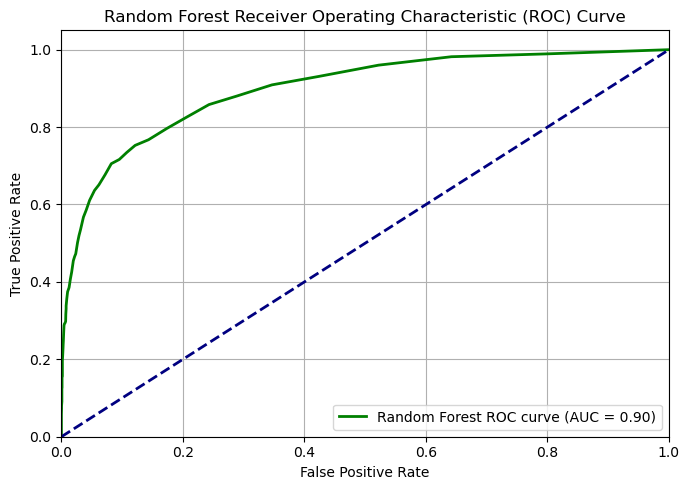

In [340]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()